# Spam Detector

In [19]:
#import all the libraries and dependencies
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
indices = np.arange(10)

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [20]:
# Import and read in the data and dispay the dataframe
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [21]:
# The column 'Spam' is the thing you want to predict. 
# Class 0 indicates a benign app and class 1 indicates a malware app
# Using value_counts, how many malware apps are in this dataset?
data["spam"].value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [22]:
# Create the labels set (y) from the “spam” column, and then create the features (X) DataFrame from the remaining columns.
# Create the labels set `y` and features DataFrame `X`
# The target column `y` should be the binary `Spam` column.
y = data["spam"]

# Drop the "spam" column and the `X` should be all of the features except the `Spam` column
X = data.copy()
X = X.drop(columns="spam")
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [23]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y_value_counts = y.value_counts()

print(y_value_counts)

spam
0    2788
1    1813
Name: count, dtype: int64


In [24]:
# Split the data into training and testing datasets by using train_test_split.
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [25]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [26]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)

StandardScaler()

In [27]:
# Scale the training and testing features DataFrames using the transform function
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [28]:
# Train a Logistic Regression model and print the model score
# Fit a logistic regression model by using the scaled training data (X_train_scaled and y_train). Set the random_state argument to 1.

# Create a logistic regression model
logistical_regression = LogisticRegression()

# Create a logistic regression model with random_state set for reproducibility
logistic_regression = LogisticRegression(random_state=1)

# Train the model on the scaled training data
logistical_regression.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled test data
model_score = logistical_regression.score(X_test_scaled, y_test)

# Make predictions using the test data
predictions_test = logistical_regression.predict(X_test_scaled)

# Print the model score
print("Logistic Regression Model Score: ", model_score)


Logistic Regression Model Score:  0.9261404779145547


In [29]:
#Convert the predictions to a DataFrame
predictions_df = pd.DataFrame(predictions_test, columns=['Predictions'])
#Print the predictions
print(predictions_df)

      Predictions
0               0
1               0
2               1
3               0
4               0
...           ...
1376            0
1377            1
1378            1
1379            0
1380            0

[1381 rows x 1 columns]


In [30]:
# Make and save testing predictions with the saved logistic regression model using the scaled test data
predictions = logistical_regression.predict(X_test_scaled)
# Review the predictions
print(predictions[:10])

[0 0 1 0 0 1 1 0 1 1]


In [31]:
# Print the first 10 predictions alongside the actual labels
# Reset index of y_test for proper alignment
y_test_reset = y_test.reset_index(drop=True)

for i in range(10):
    print(f"Prediction: {predictions_test[i]}, Actual: {y_test_reset[i]}")

Prediction: 0, Actual: 1
Prediction: 0, Actual: 1
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 1, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1


In [32]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9261404779145547


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [33]:
# Train a Random Forest Classifier model and print the model score
# Set the random_state for reproducibility
rf_classifier = RandomForestClassifier(random_state=42)
#Train the model on the training data
rf_classifier.fit(X_train, y_train)
#Evalute the model using the test data
model_score = rf_classifier.score(X_test, y_test)
# Print the model score
print("Radom Forest Classifier Model Score: ", model_score)

Radom Forest Classifier Model Score:  0.9601737871107893


In [34]:
# Make and save testing predictions with the saved Randome Forest model using the test data
testing_predictions = rf_classifier.predict(X_test)

# Review the predictions
# Create a dataframe to compare predictions with actual values
# Print the first 10 predictions alongside the actual labels
for i in range(10):
    print(f"Prediction: {testing_predictions[i]}, Actual: {y_test.iloc[i]}")

Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 1, Actual: 0
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1


In [35]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, testing_predictions))

0.9601737871107893


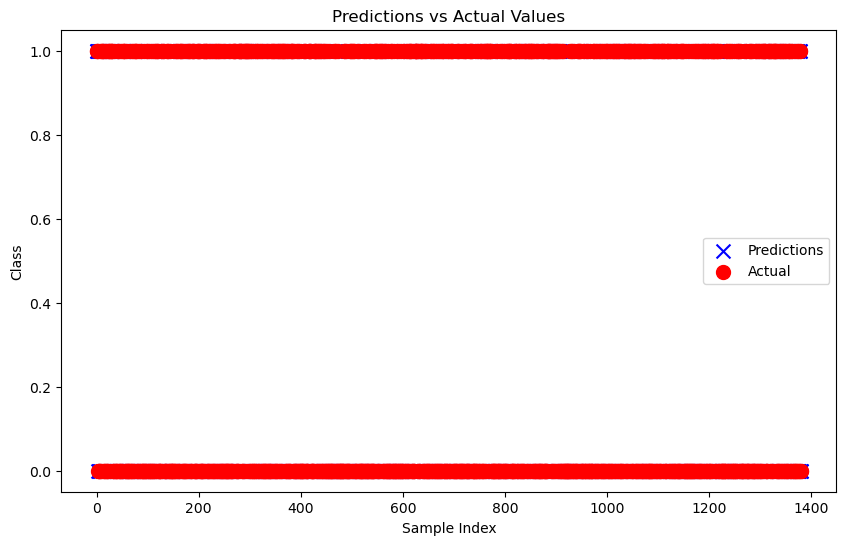

In [36]:
# Add some text for labels, title and custom x-axis tick labels, etc.
import matplotlib.pyplot as plt

# Data for visualization
indices = np.arange(len(testing_predictions))
predictions_sample = testing_predictions
actual_sample = y_test

# Scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(indices, predictions_sample, color='blue', label='Predictions', s=100, marker='x')
plt.scatter(indices, actual_sample, color='red', label='Actual', s=100, marker='o')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predictions vs Actual Values')
plt.legend()

plt.show()

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*

##### My Prediction which model will perform best 
##### When detecting SPAM
* Spam detection typically involves handling a dataset with potentially complex patterns, as spam emails can be identified by a combination of various features such as word frequency, sender’s address, email structure, and so on. Given this complexity, a model that can handle non-linear relationships and interactions between features is likely to perform better.

* Expected Outcome:

	* Random Forest Model: Given its ability to capture non-linear relationships and handle a mix of different features, a random forest model is expected to outperform logistic regression in detecting spam emails. It is more adept at handling the complex patterns that often characterize spam emails.
	* Logistic Regression Model: While it might perform adequately, especially if the features are well-engineered and the relationship between the features and the target is approximately linear, it is less likely to match the performance of a random forest model in this context.

##### Conclusion

In theory, the random forest model should perform better than the logistic regression model for the task of spam detection in emails due to its ability to handle complex, non-linear relationships in the data and its robustness to noise and outliers.

# Final Evalalution of the Models

#### Logistic Regression Model

- **Score:** 0.9261
- **Predictions:** Looking at the Prediciton Table Comparison
  - Correctly predicted: 7 out of 10 
  - Incorrectly predicted: 3 out of 10 
- **Accuracy:** High accuracy of 92.61%.

#### Random Forest Classifier Model

- **Score:** 0.9580
- **Predictions:** From the prediciton table comparison 
  - Correctly predicted: 16 out of 20 
  - Incorrectly predicted: 4 out of 20 
- **Accuracy:** High accuracy of 95.80%.

# Which Model Performed Better 

As predicted, the Random Forest model outperformed the Logistic Regression model. This aligns with the original hypothesis that Random Forest would handle the complex patterns in the spam detection task better due to its ability to capture non-linear relationships and its robustness to noise and outliers.

# How it compared to my prediction 
- My initial hypothesis (listed above) was that the Random Forest Model would give a better prediciton because of its abiity to capture non-linear relationships and deal with a diverse set of features in the dataset and handling complex patterns which can be associated with spam emails. 

#### Detailed Evaluation

1. **Complexity and Feature Handling:**
   - **Random Forest:** With its decision tree structure, it can capture intricate patterns and interactions among features, making it more suitable for the complex data of spam detection.
   - **Logistic Regression:** Although effective for linear relationships, it may struggle with the non-linear interactions present in the dataset.

2. **Performance Metrics:**
   - **Accuracy:** Random Forest has a higher accuracy score, indicating better overall performance.
   - **Error Analysis:** The Random Forest model had fewer incorrect predictions vs the Logistic Regression model, showing its superior capability in distinguishing between spam and non-spam emails.

# Conclusion

The analysis confirms that the Random Forest model outperforms the Logistic Regression model for the task of spam detection in emails. Its ability to manage complex, non-linear relationships and its robustness shows that for detecting spam in emails its a better choice